Baixando as bibliotecas necessárias e importando o CSV limpo

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
dataQ = pd.read_csv("./csv_limpo", sep=",")
dataQ.columns = dataQ.columns.str.strip()
dataQ = dataQ.drop(columns=["Unnamed: 0"])
dataQ

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Verificando em um gráfico de barras a quantidade de registros cada categoria da variável Target, onde é mostrado o status dos alunos

/tmp/ipykernel_16973/3633279914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")


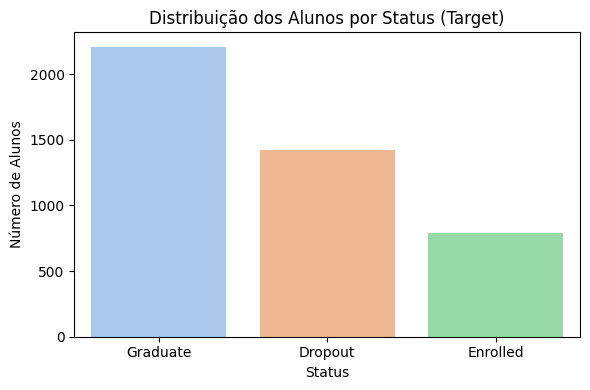

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [54]:
target_counts = dataQ["Target"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")
plt.title("Distribuição dos Alunos por Status (Target)")
plt.ylabel("Número de Alunos")
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

target_counts

Visualizando um gráfico de pizza, para mostrar visualmente a proporção de Evasões por Curso, vemos que Gestão no periodo da noite, enfermagem, jornalismo e comunicação são os cursos com mais evasão

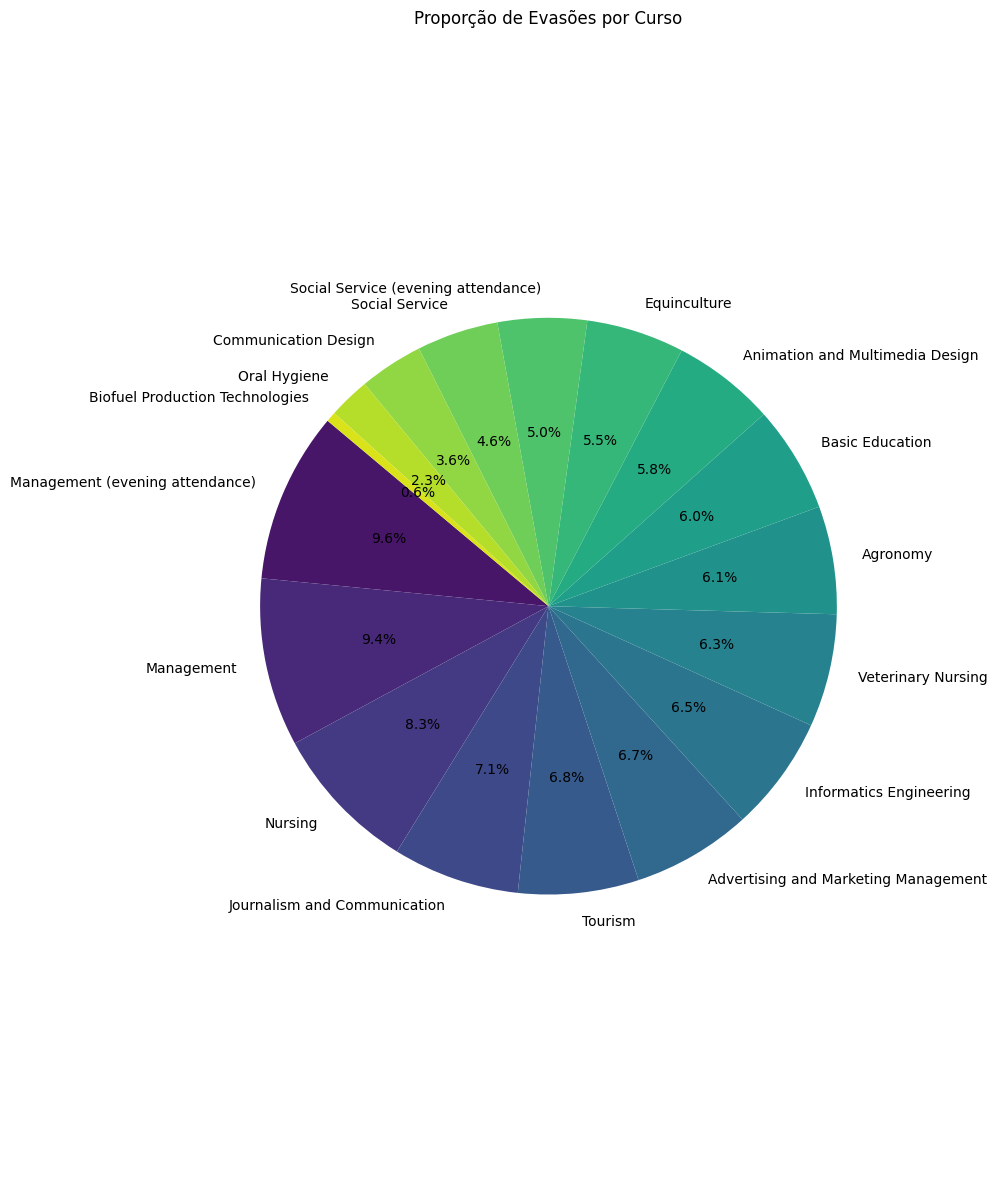

In [55]:
evasao_por_curso = dataQ[dataQ['Target'] == 'Dropout']['Course'].value_counts()
plt.figure(figsize=(10, 12))
plt.pie(evasao_por_curso.values, labels=evasao_por_curso.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(evasao_por_curso)))
plt.title("Proporção de Evasões por Curso")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [56]:
qnt =(dataQ["Gender"] == "male").sum()
qnt2 =(dataQ["Gender"] == "female").sum()

print(f"Quantidade de alunos do sexo masculino: {qnt}")
print(f"Porcentagem: {(qnt*100)/(qnt2+qnt):.2f}%\n")
print(f"Quantidade de alunos do sexo feminino: {qnt2}")
print(f"Porcentagem: {(qnt2*100)/(qnt2+qnt):.2f}%\n")

Quantidade de alunos do sexo masculino: 1556
Porcentagem: 35.17%

Quantidade de alunos do sexo feminino: 2868
Porcentagem: 64.83%



Analisando graficamente vemos que a taxa de evasão do sexo masculino é maior que o feminino

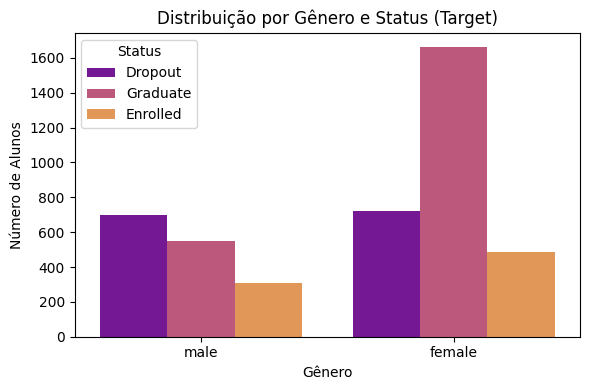

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataQ, x="Gender", hue="Target", palette="plasma")
plt.title("Distribuição por Gênero e Status (Target)")
plt.ylabel("Número de Alunos")
plt.xlabel("Gênero")
plt.legend(title="Status")
plt.tight_layout()
plt.show()


Podemos ver também que alunos com menor nota de admissão possuem maior taxa de evasão:

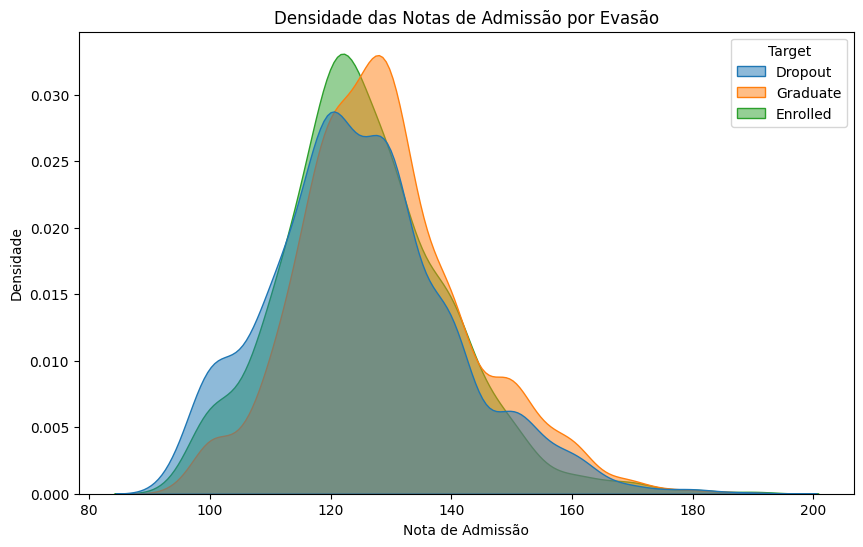

In [64]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=dataQ, x='Admission grade', hue='Target', fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Nota de Admissão')
plt.ylabel('Densidade')
plt.title('Densidade das Notas de Admissão por Evasão')

plt.show()


Analisando em relação à idade do aluno quando matriculado:

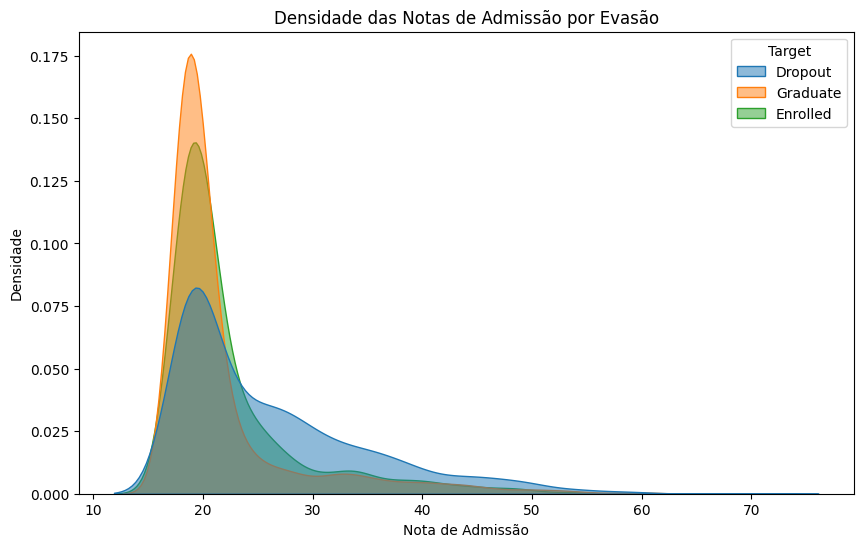

In [77]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=dataQ, x='Age at enrollment', hue='Target', fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Nota de Admissão')
plt.ylabel('Densidade')
plt.title('Densidade das Notas de Admissão por Evasão')

plt.show()

Diminuindo os extremos do gráfico para visualizar melhor a relação da idade e das notas:

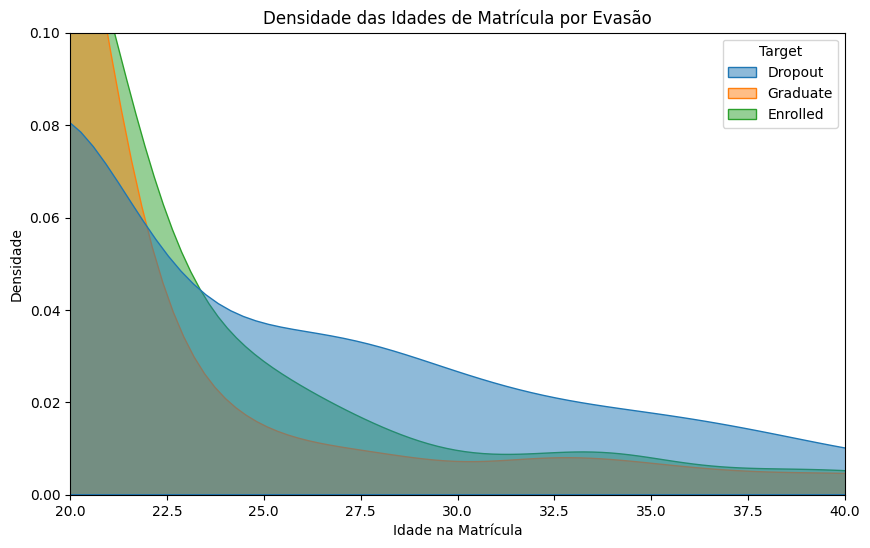

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.kdeplot(
    data=dataQ, 
    x='Age at enrollment', 
    hue='Target', 
    fill=True, 
    common_norm=False, 
    alpha=0.5
)

plt.xlabel('Idade na Matrícula')  # Aqui o eixo é 'Age at enrollment'
plt.ylabel('Densidade')
plt.title('Densidade das Idades de Matrícula por Evasão')

# Zoom → ajusta limites do eixo X e/ou Y
plt.xlim(20, 40)   # por exemplo, só entre 15 e 30 anos
plt.ylim(0, 0.1)   # opcional: se quiser limitar o eixo Y também

plt.show()


Assim, podemos ver que a taxa de evasão passa a ser maior que a taxa de graduados a partir dos 25 anos.

Agora, vamos analisar a relação entre o estudante ser internacional ou não e a taxa de evasão (Em relação à porcentagem, para uma comparação proporcional)

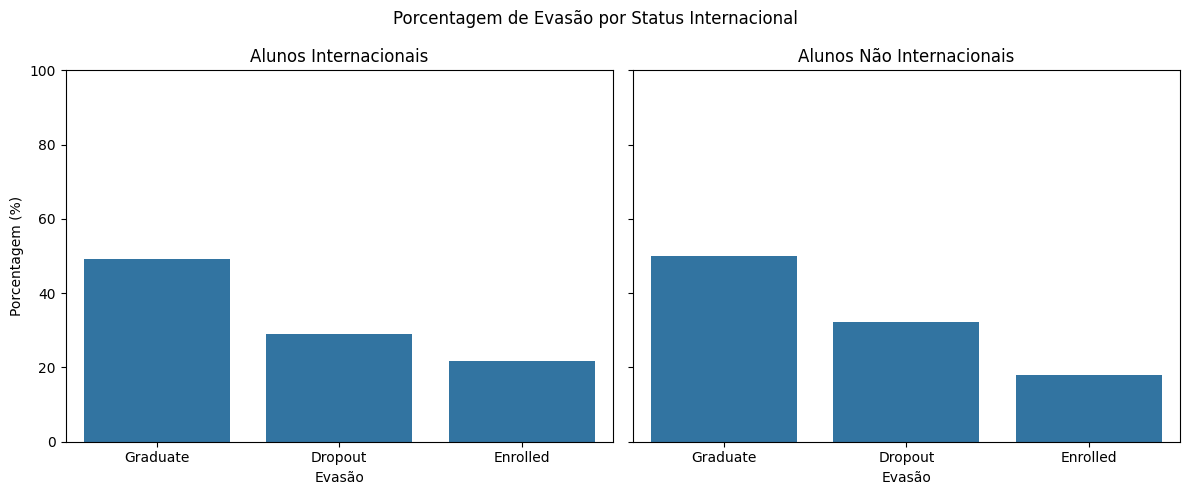

Alunos Internacionais Graduados: 49.09%
Alunos Internacionais Que evadiram: 29.09%

Alunos Não Internacionais Graduados: 49.95%
Alunos Não Internacionais Que evadiram: 32.20%



In [ ]:
grupos = {
    'Alunos Internacionais': dataQ[dataQ['International'] == 'yes'],
    'Alunos Não Internacionais': dataQ[dataQ['International'] == 'no']
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (titulo, grupo) in zip(axes, grupos.items()):
    proporcao = (grupo['Target'].value_counts(normalize=True) * 100).reset_index()
    proporcao.columns = ['Target', 'Porcentagem']
    
    sns.barplot(data=proporcao, x='Target', y='Porcentagem', ax=ax)
    ax.set_title(titulo)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Evasão')
    ax.set_ylabel('Porcentagem (%)' if titulo == 'Alunos Internacionais' else '')

plt.suptitle('Porcentagem de Evasão por Status Internacional')
plt.tight_layout()
plt.show()

for titulo, grupo in grupos.items():
    total = len(grupo)
    graduados = (grupo['Target'] == 'Graduate').sum()
    evadiram = (grupo['Target'] == 'Dropout').sum()
    
    graduados_pct = (graduados / total) * 100
    evadiram_pct = (evadiram / total) * 100
    
    print(f"{titulo} Graduados: {graduados_pct:.2f}%")
    print(f"{titulo} Que evadiram: {evadiram_pct:.2f}%\n")
